<a href="https://colab.research.google.com/github/N4than13L/probabilidad-de-sobrevivir-al-hundimiento-del-titanic/blob/master/Arboles_de_desicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
datos = pd.read_csv('probabilidad-de-sobrevivir-al-hundimiento-del-titanic/Titanic.csv')

In [2]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

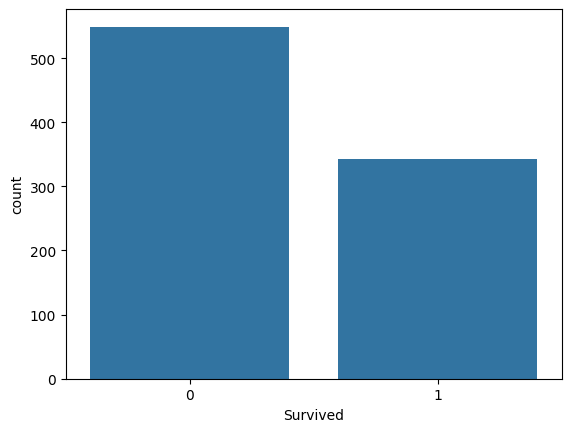

In [4]:
import seaborn as sb
sb.countplot(x='Survived', data=datos)

<Axes: xlabel='Survived', ylabel='count'>

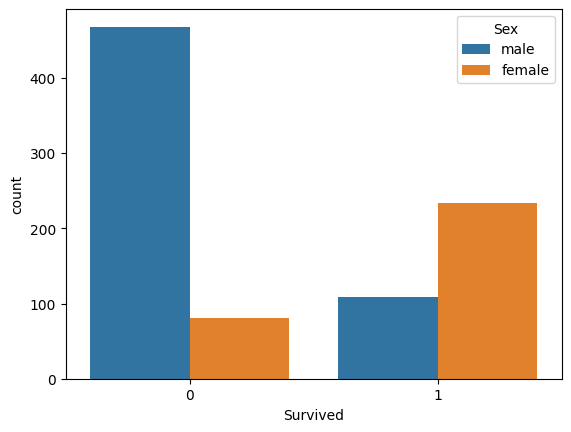

In [5]:
sb.countplot(x='Survived', hue='Sex', data=datos)

In [6]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


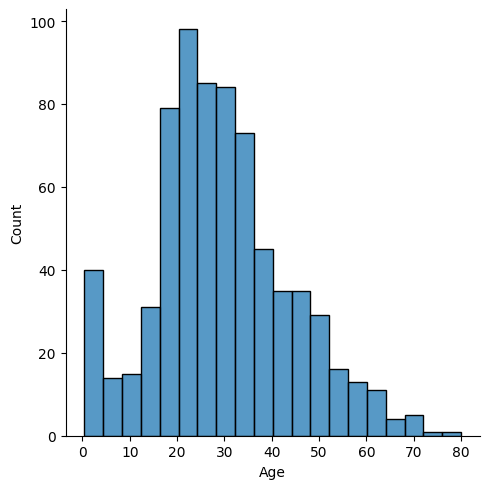

In [7]:
sb.displot(x='Age', data=datos)

In [8]:
datos['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [9]:
datos['Age'].mean()

np.float64(29.69911764705882)

In [10]:
datos['Age'].fillna(datos['Age'].mean())

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [12]:
datos['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [13]:
datos['Age'] = datos['Age'].fillna(datos['Age'].mean())

In [14]:
datos['Age']

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [15]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
datos = datos.drop(['Cabin'], axis=1)

In [17]:
datos['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [18]:
datos = datos.dropna()

In [19]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
datos = datos.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [21]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True, dtype=int)


In [22]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

In [23]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [24]:
datos = datos.drop(['Sex'], axis=1)

KeyError: "['Sex'] not found in axis"

In [25]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


<Axes: xlabel='Survived', ylabel='count'>

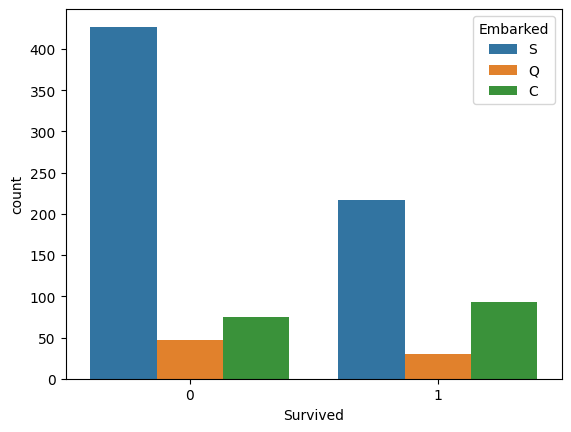

In [26]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [27]:
dumies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True, dtype=int)

In [28]:
datos = datos.join(dumies_embarked)
datos = datos.drop(["Embarked"], axis=1)

In [ ]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

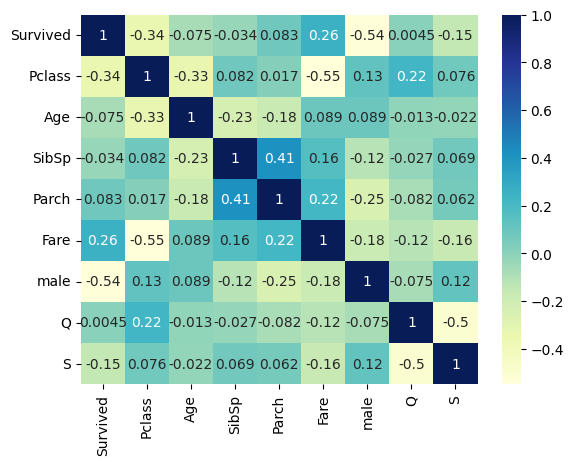

In [29]:
sb.heatmap(datos.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='Survived', ylabel='count'>

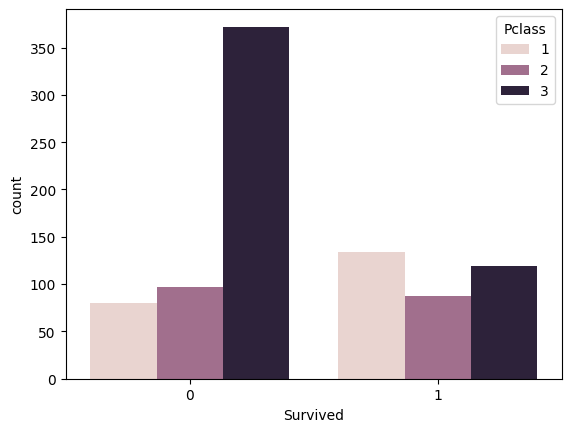

In [30]:
sb.countplot(x='Survived', data=datos, hue='Pclass')

In [31]:
X = datos.drop(['Survived'], axis=1)
y = datos['Survived']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicciones)

0.7247191011235955

In [36]:
from sklearn.tree import DecisionTreeClassifier

resultado=[]
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_train, y_train)
  predicciones = modelo.predict(X_test)
  exactitud = accuracy_score(y_test, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultado.append(exactitud)

Resultado para 1: 0.7191011235955056
Resultado para 2: 0.7359550561797753
Resultado para 3: 0.7584269662921348
Resultado para 4: 0.7640449438202247
Resultado para 5: 0.7696629213483146
Resultado para 6: 0.7640449438202247
Resultado para 7: 0.7752808988764045
Resultado para 8: 0.7752808988764045
Resultado para 9: 0.7471910112359551
Resultado para 10: 0.7359550561797753
Resultado para 11: 0.7247191011235955
Resultado para 12: 0.7247191011235955
Resultado para 13: 0.7078651685393258
Resultado para 14: 0.7078651685393258


<Axes: >

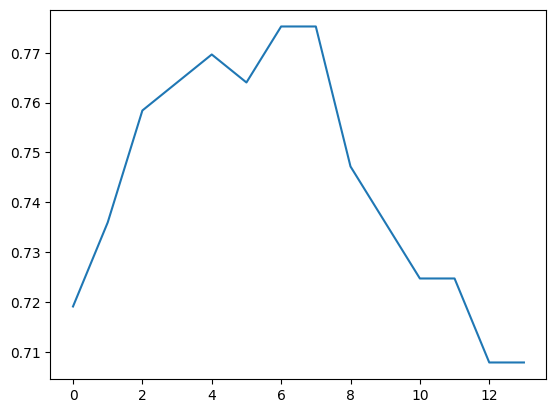

In [37]:
sb.lineplot(data=resultado)

In [38]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)
exactitud = accuracy_score(y_test, predicciones)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.77      0.69      0.73        78

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.77      0.78      0.77       178



In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

array([[84, 16],
       [24, 54]])

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.77      0.69      0.73        78

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.77      0.78      0.77       178



In [42]:
pd.DataFrame(confusion_matrix(y_test, predicciones), columns=['Pred: No', 'Pred:si'], index=['Real: No', 'Real: Si'])

,Pred: No,Pred:si
Real: No,84,16
Real: Si,24,54


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicciones)

array([[84, 16],
       [24, 54]])

In [44]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

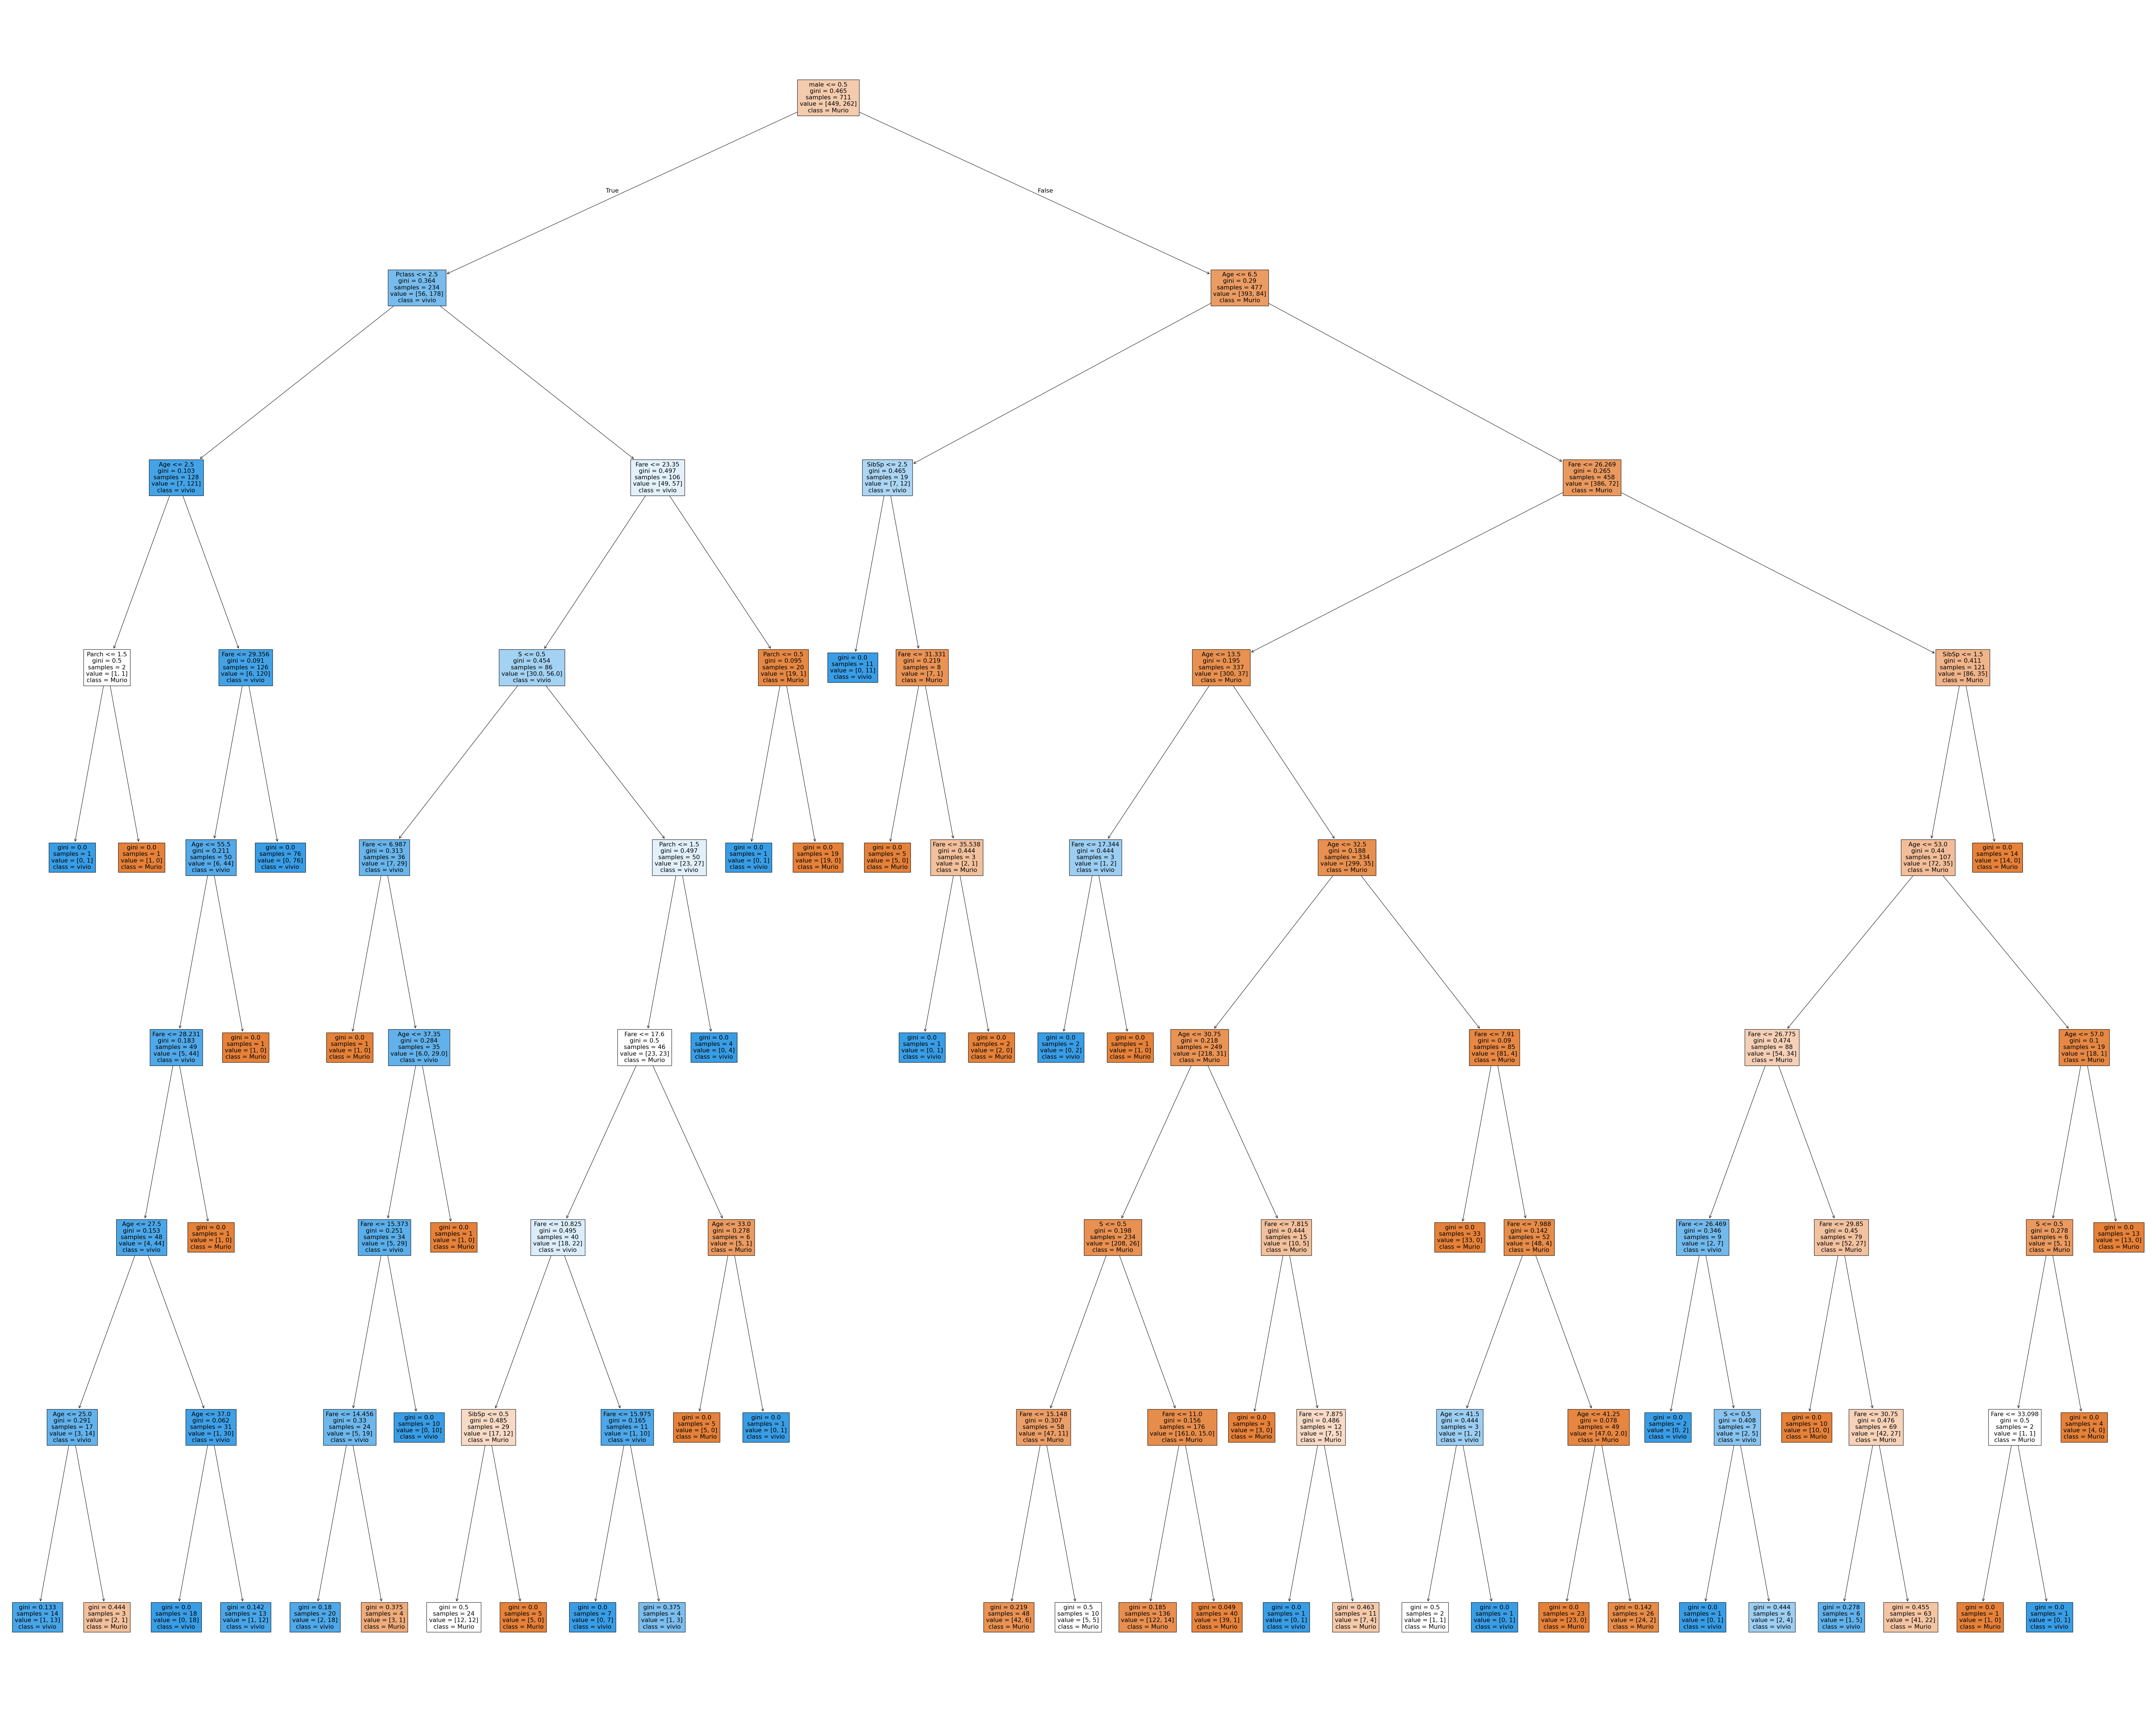

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(modelo, feature_names=X_train.columns, class_names=['Murio', 'vivio'], filled=True)
plt.show()

In [46]:
pd.DataFrame(confusion_matrix(y_test, predicciones), columns=['Pred: No', 'Pred:si'], index=['Real: No', 'Real: Si'])

,Pred: No,Pred:si
Real: No,84,16
Real: Si,24,54


In [47]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [49]:
nueva_persona = [1,25, 0,0,90,1,0,0]
predicciones = modelo.predict([nueva_persona])

if predicciones[0] == 1:
    print("No sobrevivió")
else:
    print("Si sobrevivió")

Si sobrevivió


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
